In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import itertools as it
import collections
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt

/home/ytanigaw/.conda/envs/pgenlib/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# This note describes the results for condition (3) in the following four sets of experiments
1. NO `--keep` `--blocks-max-kb 1000` `--blocks-min-maf .001`
  - https://github.com/rivas-lab/nanopore/blob/master/dev/scripts/20170513/chr20impv1-max1mbp-minmaf001.blocks.det.boxplot.ipynb
  - ‘/share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf001.blocks.det’
  - median=490.0
2. `--keep` `--blocks-max-kb 1000` `--blocks-min-maf .01`
  - https://github.com/rivas-lab/nanopore/blob/master/dev/scripts/20170513/chr20impv1-max1mbp-minmaf01.blocks.det.boxplot.ipynb
  - ‘/share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf01.blocks.det’
  - median=1128.0
3. `--keep` `--blocks-max-kb 10000` `--blocks-min-maf .001`
  - https://github.com/rivas-lab/nanopore/blob/master/dev/scripts/20170513/chr20impv1-max10mbp-minmaf001.blocks.det.boxplot.ipynb
  - ‘/share/PI/mrivas/ukbb/download/chr20impv1-max10mbp-minmaf001.blocks.det’
  - median=802.0
4. `--keep` `--blocks-max-kb 1000` `--blocks-min-maf .05`
  - https://github.com/rivas-lab/nanopore/blob/master/dev/scripts/20170513/chr20impv1-max1mbp-minmaf05.blocks.det.boxplot.ipynb
  - ‘/share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf05.blocks.det’
  - median=1185.5

# LD block on chr20 in UKBB population
- LD block structure is computed with plink1.9 `--blocks` option

```
[ytanigaw@sh-102-07 ~]$ /share/PI/mrivas/bin/plink --bfile /share/PI/mrivas/ukbb/download/chr20impv1 --keep /share/PI/mrivas/data/ukbb/phefiles/initialdata/1389.phe --memory 40000 --out /share/PI/mrivas/ukbb/download/chr20impv1-max10mbp-minmaf001 --blocks-min-maf .001 --blocks-max-kb 10000 --blocks no-pheno-req
PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /share/PI/mrivas/ukbb/download/chr20impv1-max10mbp-minmaf001.log.
Options in effect:
  --bfile /share/PI/mrivas/ukbb/download/chr20impv1
  --blocks no-pheno-req
  --blocks-max-kb 10000
  --blocks-min-maf .001
  --keep /share/PI/mrivas/data/ukbb/phefiles/initialdata/1389.phe
  --memory 40000
  --out /share/PI/mrivas/ukbb/download/chr20impv1-max10mbp-minmaf001

257674 MB RAM detected; reserving 40000 MB for main workspace.
1619597 variants loaded from .bim file.
152249 people (0 males, 0 females, 152249 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/share/PI/mrivas/ukbb/download/chr20impv1-max10mbp-minmaf001.nosex .
--keep: 112338 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 112338 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate in remaining samples is 0.995695.
1619597 variants and 112338 people pass filters and QC.
Note: No phenotypes present.
--blocks: 20746 haploblocks written to
/share/PI/mrivas/ukbb/download/chr20impv1-max10mbp-minmaf001.blocks .
Extra block details written to
/share/PI/mrivas/ukbb/download/chr20impv1-max10mbp-minmaf001.blocks.det .
Longest span: 248.13kb.
```

In [3]:
block_det = '/share/PI/mrivas/ukbb/download/chr20impv1-max10mbp-minmaf001.blocks.det'

In [4]:
block = pd.read_table(block_det, delimiter='\s+')

In [5]:
block.head()

,CHR,BP1,BP2,KB,NSNPS,SNPS
0,20,60828,61098,0.271,2,rs187713677|rs6078030
1,20,61270,63452,2.183,7,rs143291093|rs4814683|rs192879424|rs34147676|r...
2,20,63733,63808,0.076,3,rs75670495|rs1418258|rs76004960
3,20,63967,66370,2.404,7,rs116770801|rs190945171|rs139108478|rs13043000...
4,20,67500,67760,0.261,2,rs112142516|rs113878089


## box plot

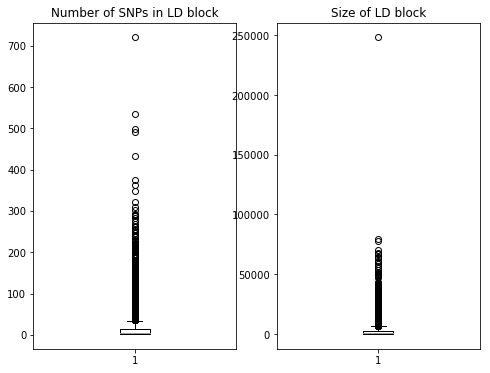

In [6]:
fig = plt.figure(figsize=(8,6))
axs = [fig.add_subplot(1, 2, i+1) for i in range(2)]
axs[0].set_title('Number of SNPs in LD block')
axs[0].boxplot(block['NSNPS'])
axs[1].set_title('Size of LD block')
axs[1].boxplot(block['BP2'] - block['BP1'])
fig.savefig('chr20impv1-max10mbp-minmaf001.blocks.det.boxplot.png')

## box plot (log10 scale)

/home/ytanigaw/.conda/envs/pgenlib/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


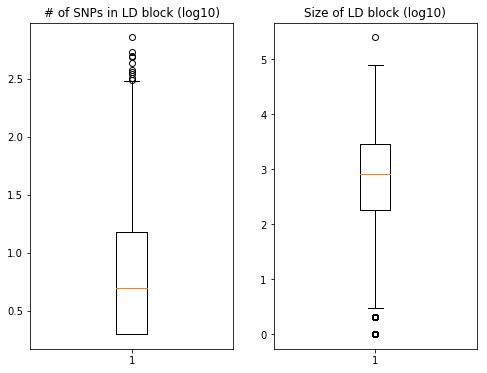

In [7]:
fig_log = plt.figure(figsize=(8,6))
axs_log = [fig_log.add_subplot(1, 2, i+1) for i in range(2)]
axs_log[0].set_title('# of SNPs in LD block (log10)')
axs_log[0].boxplot(np.log(block['NSNPS']) / np.log(10))
axs_log[1].set_title('Size of LD block (log10)')
axs_log[1].boxplot(np.log(block['BP2'] - block['BP1']) / np.log(10))
fig_log.savefig('chr20impv1-max10mbp-minmaf001.blocks.det.boxplot_log.png')

## Note: maf >= .05 filter and population stratification
- We have used `.05` as a cutoff for minor allele frequency. This filter reduced the number of SNP marks from 1.6 M to 287 K
- keep 112338 people

In [8]:
!wc -l /share/PI/mrivas/ukbb/download/chr20impv1.bim

1619597 /share/PI/mrivas/ukbb/download/chr20impv1.bim


In [9]:
np.sum(block['NSNPS'])

287037

In [10]:
print np.median(block['BP2'] - block['BP1'])
print np.mean(block['BP2'] - block['BP1'])
print np.median(block['NSNPS'])
print np.mean(block['NSNPS'])

802.0
2457.39973971
5.0
13.8357755712
